In [1]:
%load_ext autoreload
%autoreload 2

# Basic usage of `Cellij`

In [2]:
import cellij

/Users/tim.treis/anaconda3/envs/spatialdata/envs/cellij/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/tim.treis/anaconda3/envs/spatialdata/envs/cellij/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/tim.treis/anaconda3/e

## Load data
This notebook uses a subset of a chronic lymphocytic leukaemia (CLL) data set, which combined ex vivo drug response measurements with somatic mutation status, transcriptome profiling and DNA methylation assays. [1]

1: Drug-perturbation-based stratification of blood cancer by Dietrich et al. (2018) 

In [3]:
mdata = cellij.Importer().load_Guo2010()
mdata.obs[["division_scaled"]]

,division_scaled
obs0_1,0.0
obs1_1,0.0
obs2_1,0.0
obs3_1,0.0
obs4_1,0.0
...,...
obs432_64_TE,1.0
obs433_64_TE,1.0
obs434_64_TE,1.0
obs435_64_TE,1.0


## Define the FactorModel
bla bla, set n_factors because there is no optimum/correct

In [4]:
model = cellij.FactorModel(n_factors=10)
model.add_data(mdata)
model.set_model_options(
    covariates = mdata.obs[["division_scaled"]]
)
model.set_training_options(
    verbose_epochs = 1
)
model

FactorModel(n_factors=10)
├─ data
│  └─ qPCR: 437 observations × 48 features
│     ├ likelihood: Normal
│     └ weight_prior: Normal
├─ groups
│  └─ all_observations: 437 observations
│     └ factor_prior: GaussianProcess
├─ covariates
│  └─ 1D covariate with 437 observations
└─ config
   ├─ data options
   │  ├─ scale_views: False
   │  ├─ scale_features: False
   │  └─ center_features: True
   └─ training options
      ├─ early_stopping: True
      ├─ verbose_epochs: 1
      ├─ patience: 500
      ├─ min_delta: 0.1
      ├─ percentage: True
      ├─ scale_gradients: True
      ├─ optimizer: ClippedAdam
      ├─ num_particles: 1
      └─ learning_rate: 0.003

In [5]:
model.fit(1000)

torch.float32
z torch.Size([437, 10, 437])
w torch.Size([1, 1, 10, 48])


RuntimeError: einsum(): subscript j has size 48 for operand 1 which does not broadcast with previously seen size 437

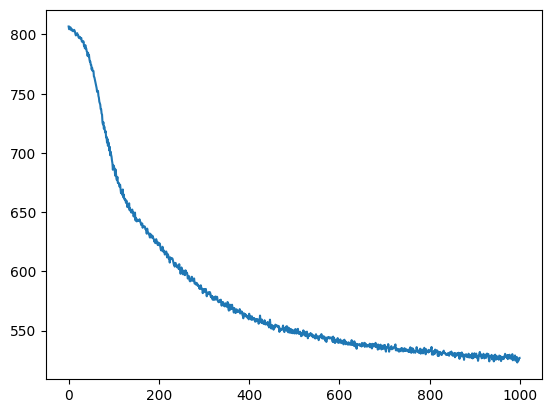

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.train_loss_elbo)